In [80]:
# !pip install praw textblob wordcloud spacy psaw
# !pip install certifi

# !python3 -m spacy download en_core_web_sm


In [81]:
import praw
import spacy
from collections import Counter
import certifi
certifi.where()


# Initialize PRAW
reddit = praw.Reddit(
    client_id="uTp5HipGLhBhPv1S7oxk8A",
    client_secret="AcT-azqNdIT3onTltclkX4Q3ISUDDQ",
    user_agent="mads", # Example: "company_extractor"
)

nlp = spacy.load("en_core_web_sm")

In [82]:

def extract_posts_from_subreddit(subreddit_name, post_limit=10000):
    """Extracts top post titles from the given subreddit over the last month."""
    subreddit = reddit.subreddit(subreddit_name)
    posts = []

    for post in subreddit.top('month', limit=post_limit):
        posts.append(post.title)
    return posts

subreddit_name = "wallstreetbets"
titles = extract_posts_from_subreddit(subreddit_name)


/var/folders/2y/cdq7gq793zv_hv_24mzg1qym0000gn/T/ipykernel_66943/3077964436.py:6: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  for post in subreddit.top('month', limit=post_limit):


In [83]:
companies_counter = extract_companies(titles)
top_companies = companies_counter.most_common(20)
print(top_companies)


[('AI', 21), ('NVDA', 17), ('Tesla', 14), ('YOLO', 13), ('WSB', 10), ('SPY', 10), ('PYPL', 9), ('Disney', 9), ('AMC', 8), ('Nvidia', 7), ('Fed', 7), ('Apple', 6), ('PLTR', 5), ('RIP', 4), ('Netflix', 4), ('Microsoft', 4), ('Meta', 4), ('PLUG', 4), ('META', 3), ('Amazon', 3)]


In [84]:
import nltk
nltk.download('vader_lexicon')


# Get sentiment for a text
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer(lexicon_file='/Users/benolsen/Desktop/vader_lexicon/vader_lexicon.txt')

def get_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'


# Analyze sentiment for top 20 companies
company_sentiments = {}

for company, _ in top_companies:
    positive_count = 0
    negative_count = 0
    for title in titles:
        if company in title:
            sentiment = get_sentiment(title)
            if sentiment == 'positive':
                positive_count += 1
            elif sentiment == 'negative':
                negative_count += 1
    company_sentiments[company] = {'positive': positive_count, 'negative': negative_count}



[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


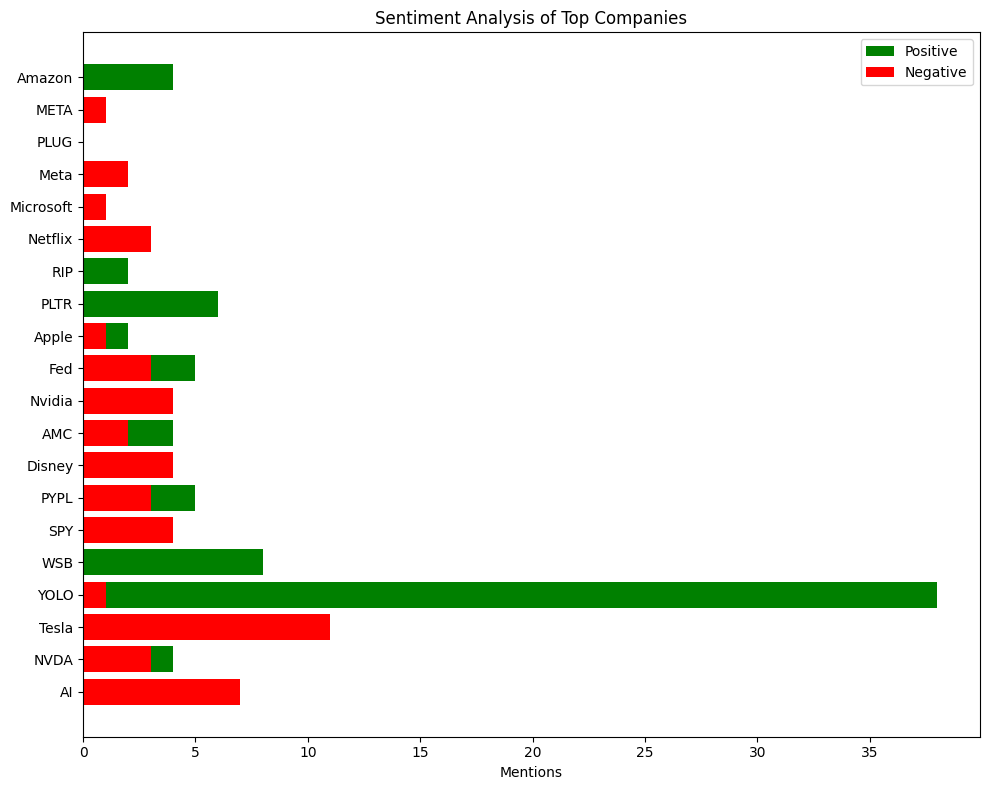

In [85]:
import matplotlib.pyplot as plt

companies = list(company_sentiments.keys())
positives = [company_sentiments[comp]['positive'] for comp in companies]
negatives = [company_sentiments[comp]['negative'] for comp in companies]

import matplotlib.pyplot as plt
import numpy as np

# Set the figure size
plt.figure(figsize=(10, 8))

# Get the positions for company labels on the y-axis
y_positions = np.arange(len(companies))

# Plot the bars
plt.barh(y_positions, positives, color='green', label='Positive')
plt.barh(y_positions, negatives, color='red', label='Negative')

# Set the title, labels, and y-ticks
plt.xlabel('Mentions')
plt.title('Sentiment Analysis of Top Companies')
plt.yticks(y_positions, companies)
plt.axvline(x=0, color='black',linewidth=0.5)  # Add a vertical line at 0
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
